In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# library datetime
from datetime import datetime
from operator import attrgetter

pd.set_option('display.max_columns', None)

# menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

# **BUSINESS PROBLEM**

> #### **Question:**</br> Analyze how to increase company profits by focusing on customer behavior, spending, and their interactions with various products and promotions.

# **DATA ANALYSIS**

## **Load Dataset**

In [2]:
df = pd.read_csv('Supermarket_Cleaning.csv')
df = df.reset_index().drop(columns=['index', 'Unnamed: 0'])
df

,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
0,55,Adult,Graduate,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,7.333333,0,0,0,0,0,0,1,1
1,60,Adult,Graduate,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,2.000000,0,0,0,0,0,0,0,0
2,48,Adult,Graduate,Married,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,20.000000,0,0,0,0,0,0,0,0
3,30,Middle Age,Graduate,Married,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,3.000000,0,0,0,0,0,0,0,0
4,33,Middle Age,Postgraduate,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,2.800000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,26,Middle Age,Graduate,Single,26816.0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,4,3,3.000000,0,0,0,0,0,0,0,0
2046,46,Adult,Graduate,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,16,8.000000,0,0,0,0,0,0,0,0
2047,33,Middle Age,Graduate,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,18,18.000000,0,1,0,0,0,0,0,1
2048,58,Adult,Postgraduate,Married,69245.0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,21,10.500000,0,0,0,0,0,0,0,0


In [3]:
df['Recency'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
def annotate_bars(plots):
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.0f'), 
                    (bar.get_x() + bar.get_width() / 2, 
                        bar.get_height()), ha='center', va='center',
                        size=7, xytext=(0, 8),
                        textcoords='offset points')

## **Customer Demographic Analysis**
- Objective: Understand customer characteristics

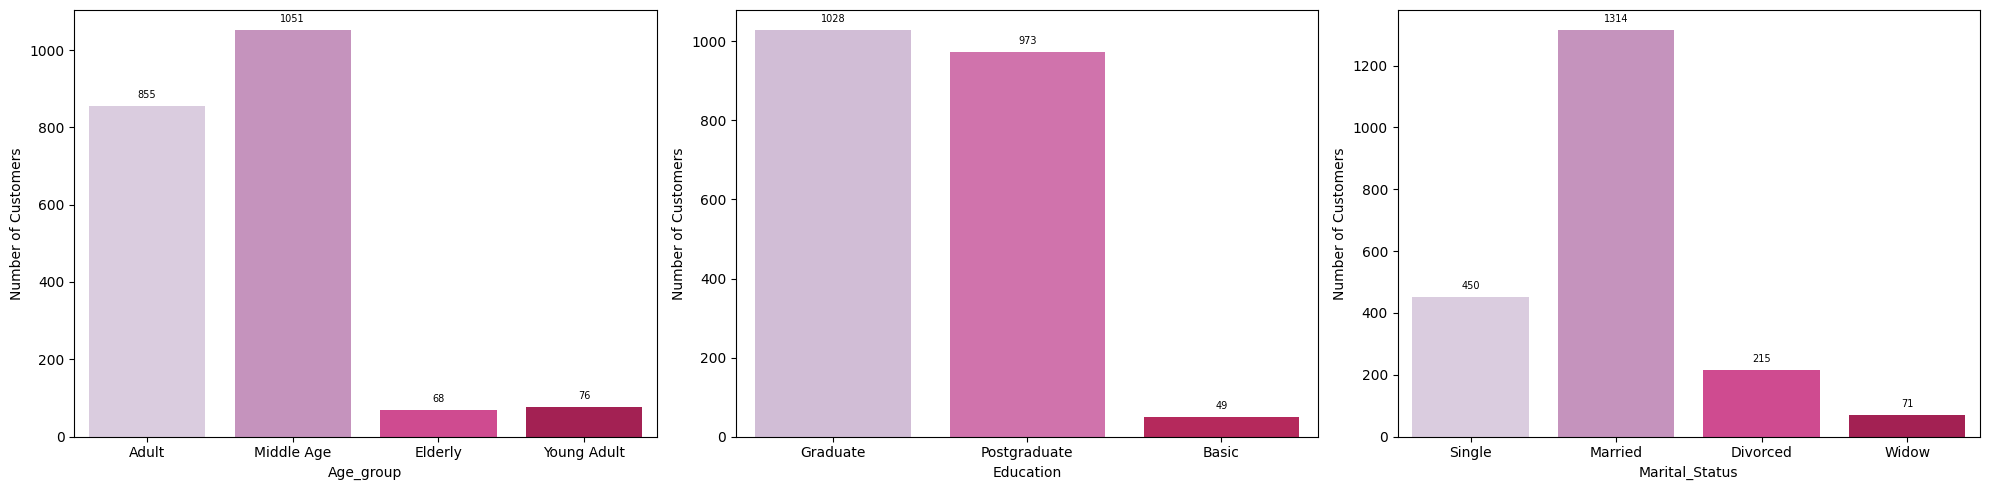

In [5]:
# Melihat distribusi berdasarkan usia, pendidikan dan status pernikahan
cat = ['Age_group', 'Education', 'Marital_Status']

# Menentukan jumlah kolom untuk subplot
n_cols = 3
n_rows = -(-len(cat) // n_cols)  # Menghitung jumlah baris yang dibutuhkan tanpa math.ceil()

# Membuat figure untuk subplot
fig = plt.figure(figsize=(20, 5))

# Looping melalui setiap kolom untuk menampilkan countplot
for i, column in enumerate(cat, 1):
    fig.add_subplot(n_rows, n_cols, i)
    bar = sns.countplot(x=df[column], palette="PuRd")
    
    # Menambahkan anotasi ke setiap bar menggunakan fungsi annotate_bars
    annotate_bars(bar)
    
    # Mengatur label dan limit
    plt.ylabel('Number of Customers', fontsize=10, loc='center')
    plt.tight_layout()

# Menampilkan visualisasi
plt.show()

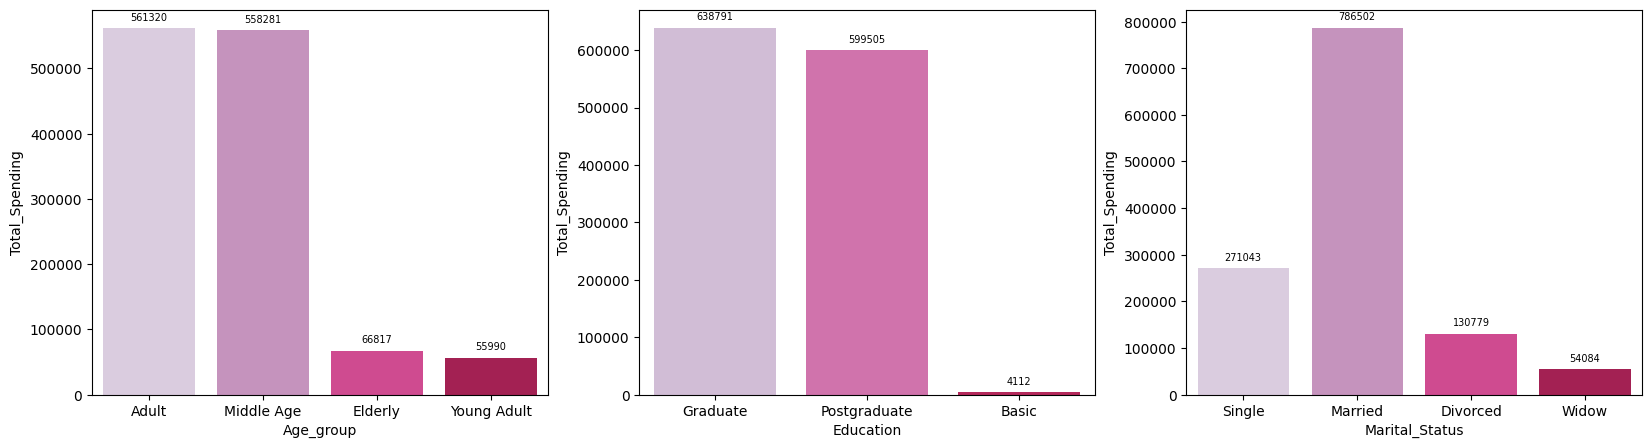

In [6]:
plot_configs = [
    {'x': 'Age_group', 'y': 'Total_Spending'},
    {'x': 'Education', 'y': 'Total_Spending'},
    {'x': 'Marital_Status', 'y': 'Total_Spending'}
]

plt.figure(figsize=(20, 5))

# Looping untuk membuat plot
for i, config in enumerate(plot_configs, 1):
    plt.subplot(1, 3, i)
    plots = sns.barplot(df, x=config['x'], y=config['y'], estimator='sum', ci=0, palette="PuRd")
    annotate_bars(plots)

plt.show()

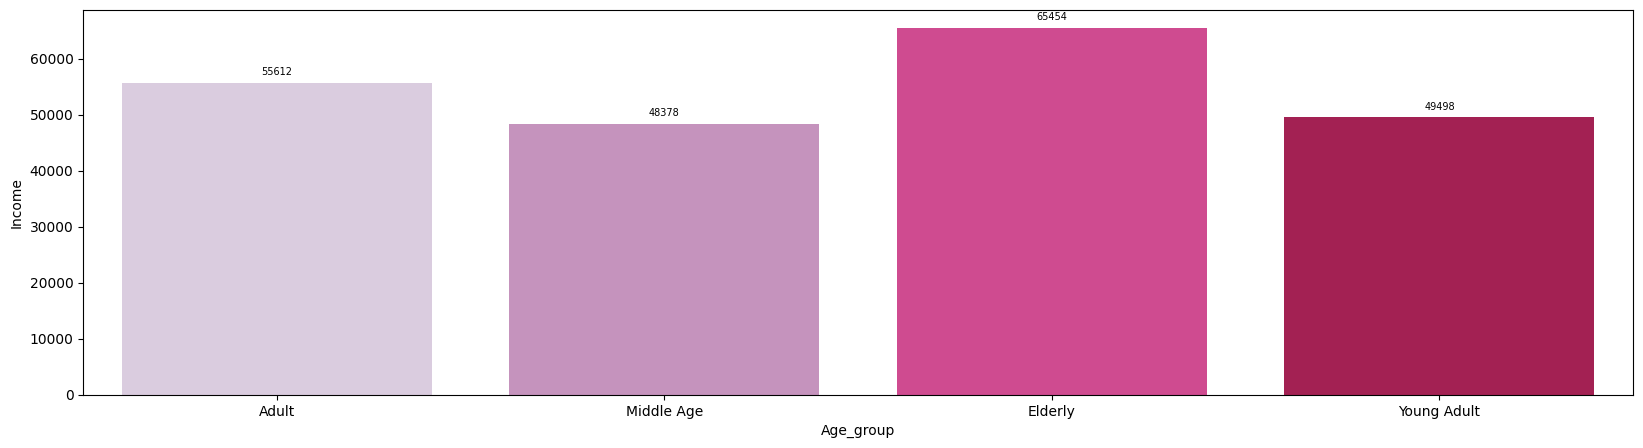

In [7]:
# Melihat Rata-rata pendapatan berdasarkan usia
plt.figure(figsize=(20, 5))
plot = sns.barplot(df, x='Age_group', y='Income', ci=0, palette='PuRd')
annotate_bars(plot)
plt.show()

<Axes: xlabel='Income'>

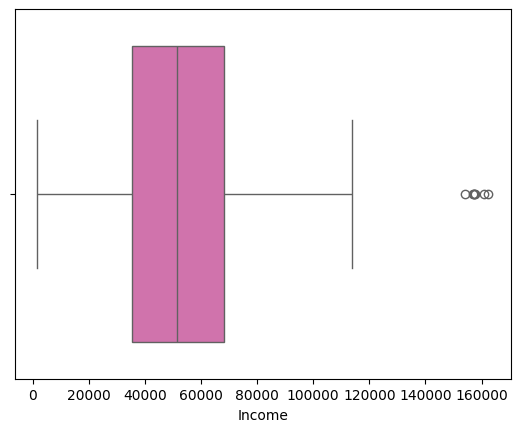

In [8]:
# Melihat distribusi berdasarkan pendapatan
sns.boxplot(x=df['Income'], palette='PuRd')

**Insight:**
- **Influence of Age and Income on Spending:** Customers within certain age ranges tend to spend more on specific product categories. Older customers with higher incomes are more likely to spend money on premium products like wine and meat.
- **Spending Differences Based on Education Level:** Customers with higher education may prefer healthier or organic products, which tend to be more expensive. This can be a target for campaigns promoting healthy or premium products.
- **Marital Status and Household Spending:** Married customers tend to shop more for household necessities. This can be optimized by offering promotional packages for families or discounts for bulk purchases.

## **Customer Spending Analysis**
- Objective: Identify customer spending patterns on various products to determine the best-selling products and those with potential for sales growth.

Wines     623329
Meat      343818
Gold       89536
Fish       76279
Sweet      55794
Fruits     53652
dtype: int64

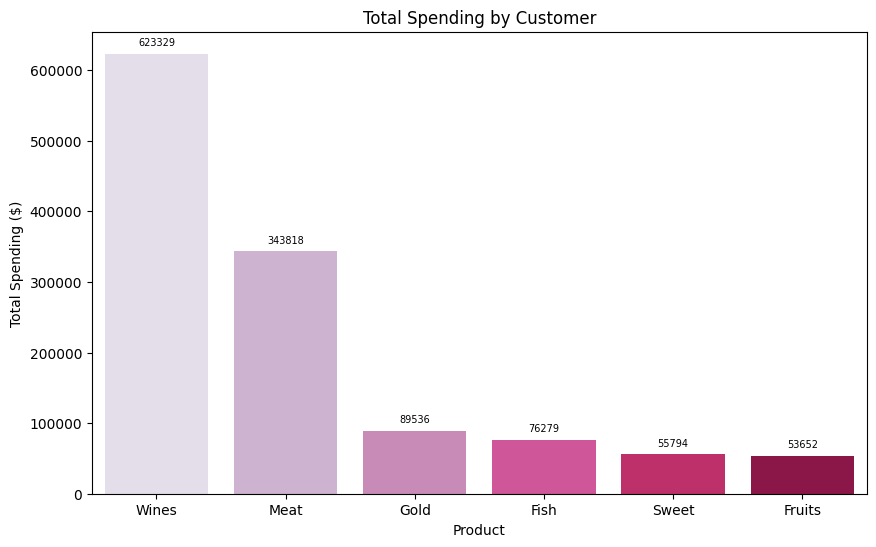

In [9]:
# Menggabungkan jumlah per product
product = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
total_product = df[product].sum().sort_values(ascending=False)
display(total_product)

plt.figure(figsize=(10,6))
plots = sns.barplot(x=total_product.index, y=total_product, palette='PuRd')
plt.title('Total Spending by Customer')
plt.xlabel('Product', fontsize=10, loc='center')
plt.ylabel('Total Spending ($)', fontsize=10, loc='center')

annotate_bars(plots)
plt.show()

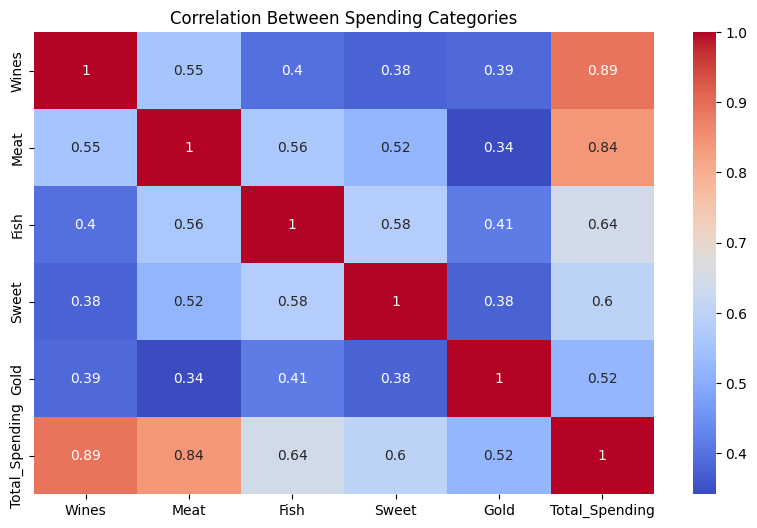

In [10]:
# Melihat Korelasi setiap Product dan Total Spending
plt.figure(figsize=(10,6))
sns.heatmap(df[['Wines', 'Meat', 'Fish', 'Sweet', 'Gold', 'Total_Spending']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Spending Categories')
plt.show()

**Insight:**
- **Identify High-Profit Products:** Product categories with high spending, such as wine and meat, can be targeted for margin improvement through pricing strategies or cost reduction.
- **Opportunities for Cross-Selling:** Customers who frequently purchase certain products, like wine, can be targeted for cross-selling with other products such as meat. Offering bundles or discounts on combined purchases can help boost sales.
- **Promotional Strategies Based on Spending Trends:** If there are product categories with low spending but high importance, the company could increase promotions for those products to boost sales volume and attract price-sensitive customers.
- **Stock Optimization:** Manage stock of highly correlated products to meet the demand of customers with similar spending patterns.

## **Recency, Frequency, and Monetary (RFM) Analysis**
- Objective: Segment customers based on how recently they made a purchase (Recency), how often they shop (Frequency), and how much they spend (Monetary).

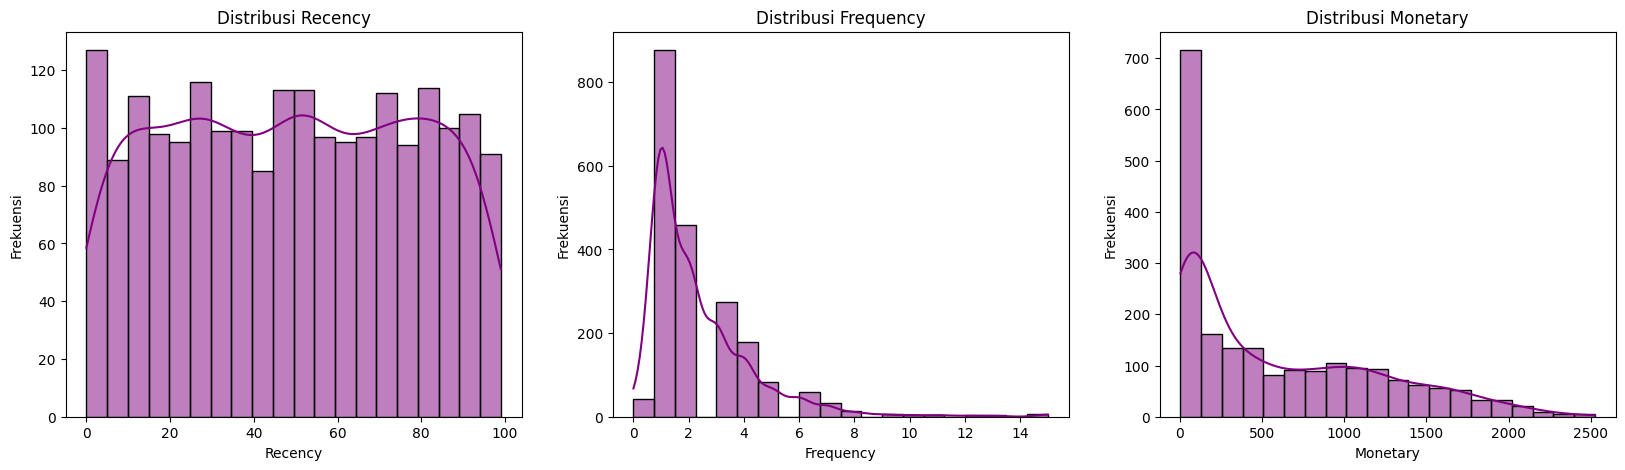

In [11]:
# Daftar kolom yang ingin divisualisasikan
columns_visualize = ['Recency', 'NumDeals', 'Total_Spending']

# Menentukan jumlah kolom untuk subplot
n_cols = 3
n_rows = -(-len(columns_visualize) // n_cols)

# Membuat figure untuk subplot
fig = plt.figure(figsize=(20, 5))

# Looping melalui setiap kolom untuk menampilkan distribusi dan boxplot
for i, column in enumerate(columns_visualize, 1):
    # Subplot untuk distribusi
    fig.add_subplot(n_rows, n_cols, i)
    his = sns.histplot(df[column], bins=20, kde=True, color="purple")
    plt.title(f'Distribusi {['Recency', 'Frequency', 'Monetary'][i-1]}')
    plt.xlabel(['Recency', 'Frequency', 'Monetary'][i-1])
    plt.ylabel('Frekuensi')

# Menampilkan visualisasi
plt.show()

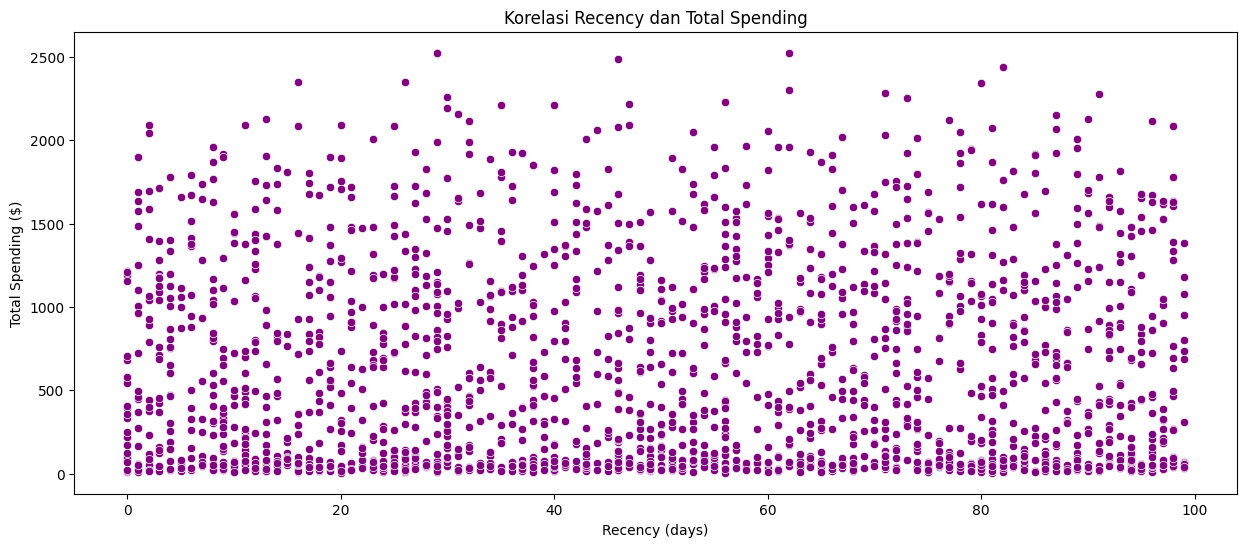

In [12]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='Recency', y='Total_Spending', data=df, color='purple')
plt.title('Korelasi Recency dan Total Spending')
plt.xlabel('Recency (days)')
plt.ylabel('Total Spending ($)')
plt.show()

**Insight :**
- **Customers with Long Last Purchase (High Recency):** These customers can be targeted with re-engagement campaigns, such as automated reminders, discounts, or special offers to entice them back.
- **High Purchase Frequency (High Frequency):** Customers who shop frequently represent the most valuable segment. Offering loyalty programs or exclusive discounts can enhance engagement and further spending from this segment.
- **Identify Customers with High Lifetime Value (High Monetary):** Customers who spend a lot of money should be prioritized in retention efforts. The company can provide premium customer service or exclusive offers to keep them loyal.

## **Analisis Efektivitas Promosi**
- Tujuan : Mengukur keberhasilan berbagai kampanye promosi untuk menentukan kampanye mana yang paling efektif.

Cmp1        0.065366
Cmp2        0.012683
Cmp3        0.073659
Cmp4        0.077073
Cmp5        0.071220
Response    0.151707
dtype: float64

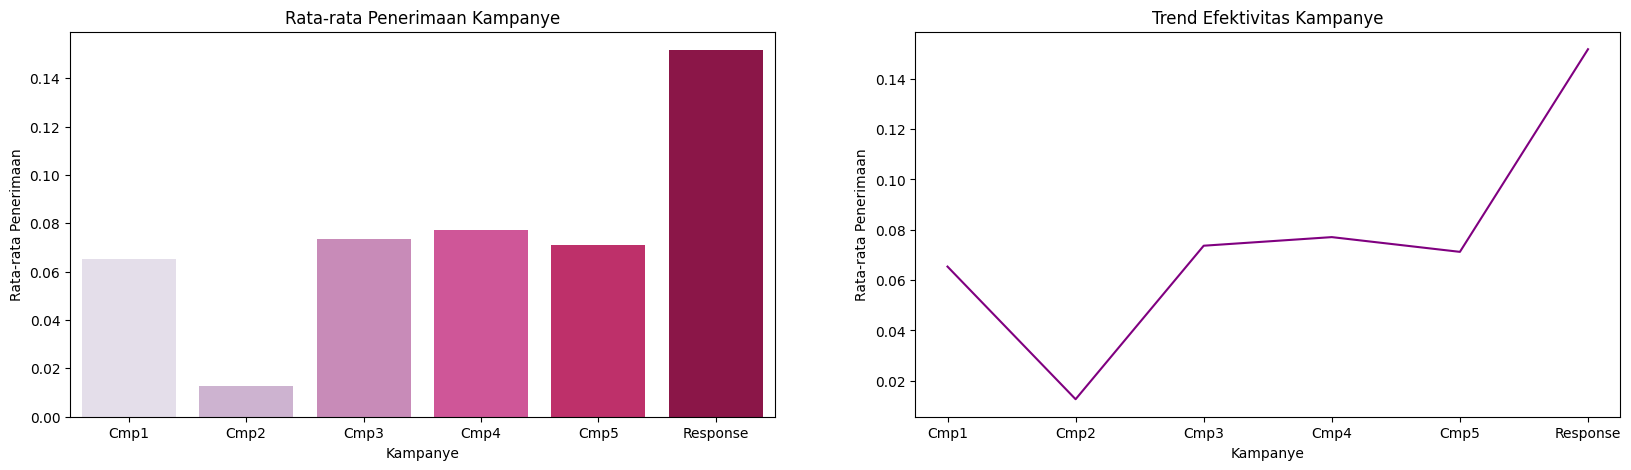

In [13]:
campaigns = ['Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Response']
avg_response = df[campaigns].mean()
display(avg_response)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
sns.barplot(x=avg_response.index, y=avg_response.values, palette='PuRd')
plt.title('Rata-rata Penerimaan Kampanye')
plt.xlabel('Kampanye')
plt.ylabel('Rata-rata Penerimaan')

plt.subplot(1,2,2)
sns.lineplot(x=campaigns, y=avg_response.values, color='purple')
plt.title('Trend Efektivitas Kampanye')
plt.xlabel('Kampanye')
plt.ylabel('Rata-rata Penerimaan')
plt.show()

**Insight :**
- **Campaign Effectiveness Based on Response:** Campaigns with the highest response rates (e.g., Cmp4) should serve as a model for future campaigns, while those with low response rates (e.g., Cmp2) need to be re-evaluated.
- **Campaign Adjustments Based on Customer Segments:** Less successful campaigns can be further analyzed to understand whether the offers or timing of the campaigns align with the targeted customer segments.
- **Optimizing Promotional Budget:** The promotional budget should be focused on campaigns that have proven effective. Reducing budgets for less effective campaigns and allocating more to those that perform better can enhance Return on Investment (ROI).

## **Purchase Channel Analysis**
- Objective: Identify which purchase channels are most frequently used by customers (Catalog, Store, Web) to enhance sales strategies through more effective channels.

NumStore      11840
NumWeb         8404
NumCatalog     5451
dtype: int64

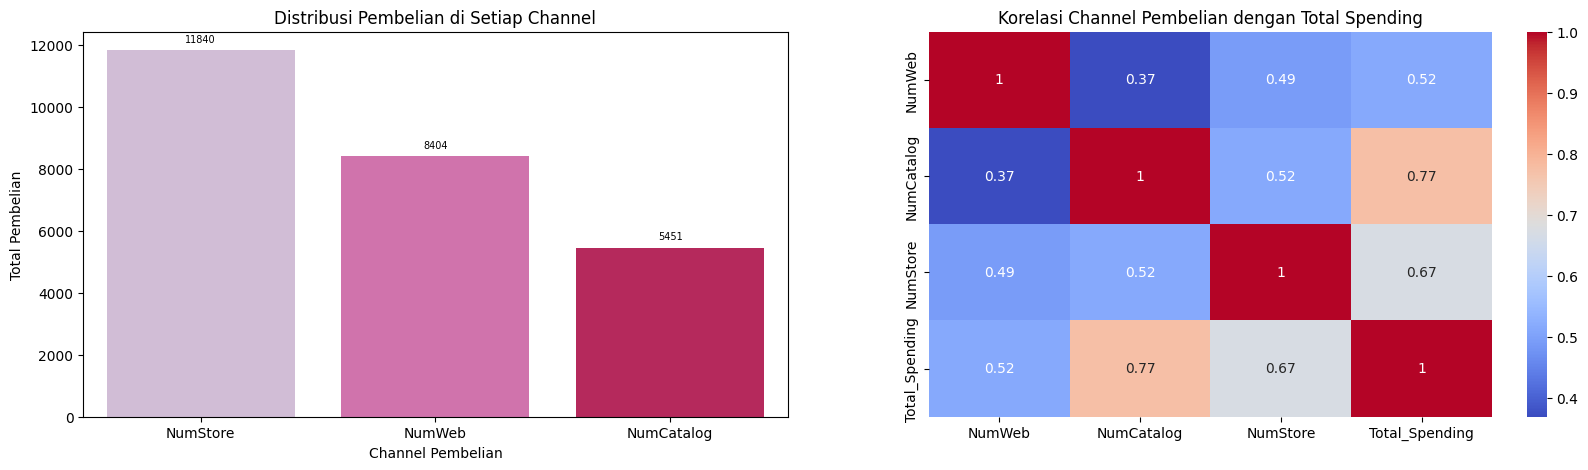

In [14]:
channels = ['NumWeb', 'NumCatalog', 'NumStore']
total_purchases = df[channels].sum().sort_values(ascending=False)
display(total_purchases)

plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
bar = sns.barplot(x=total_purchases.index, y=total_purchases.values, palette='PuRd')
plt.title('Distribusi Pembelian di Setiap Channel')
plt.xlabel('Channel Pembelian')
plt.ylabel('Total Pembelian')
annotate_bars(bar)

plt.subplot(1,2,2)
sns.heatmap(df[channels + ['Total_Spending']].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Channel Pembelian dengan Total Spending')

plt.show()

**Insight :**
- **Dominance of the Web Channel:** If purchases through the web show higher volume, the company can strengthen its digital marketing strategy and enhance the online user experience to maximize sales through this channel.
- **Strength of Offline Stores:** Despite the rise in online purchases, physical stores may still be an important channel for certain product categories. Offering a better shopping experience in physical stores or exclusive in-store promotions can attract more customers.
- **Channel Integration for an Omnichannel Strategy:** The company can integrate offerings between the web, catalog, and physical stores to provide a seamless shopping experience for customers. For example, a loyalty program that is valid across all channels or options for in-store pickup for online purchases.

## **Customer Behavior Analysis Based on Number of Children**
- Objective: Examine whether families with more children tend to spend more or purchase more products.

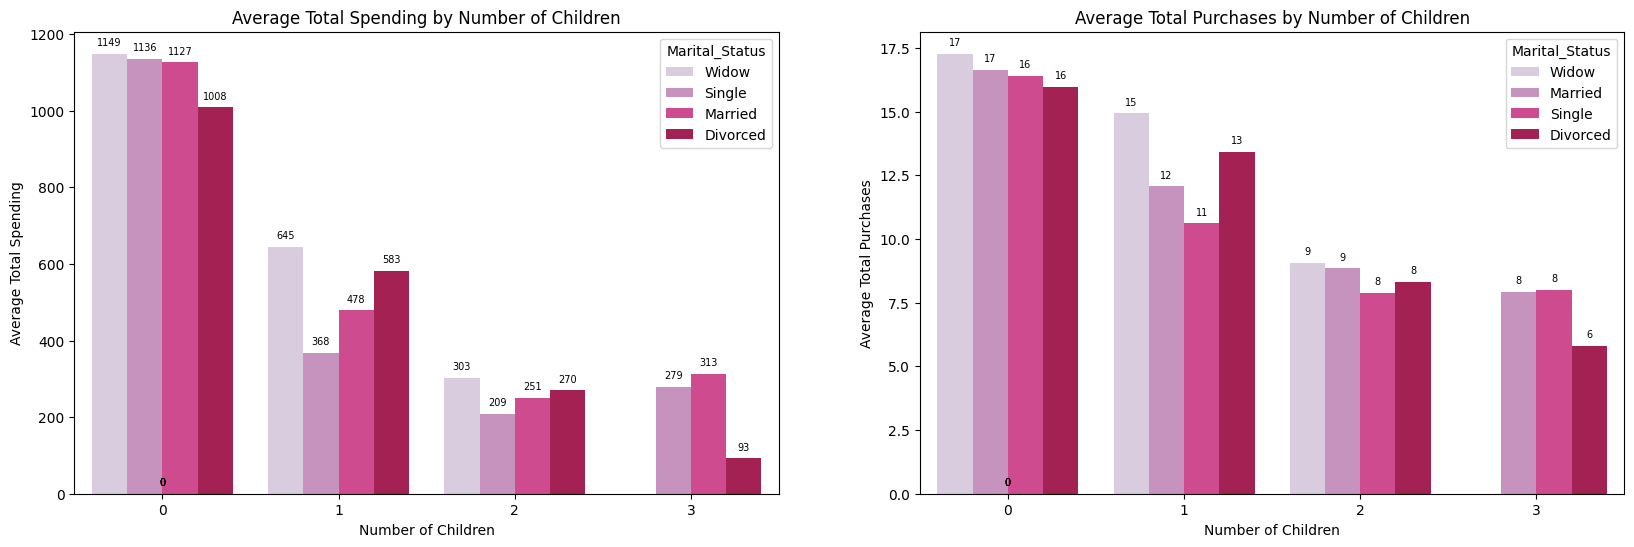

In [15]:
spending_by_children = df.groupby(['Children', 'Marital_Status'])['Total_Spending'].mean().reset_index().sort_values('Total_Spending', ascending=False)
purchases_by_children = df.groupby(['Children', 'Marital_Status'])['Total_Purchases'].mean().reset_index().sort_values('Total_Purchases', ascending=False)

plt.figure(figsize=(20, 6))

# Analisis total pengeluaran berdasarkan jumlah anak
plt.subplot(1,2,1)
plots = sns.barplot(data=spending_by_children, x='Children', y='Total_Spending', hue='Marital_Status', palette='PuRd')
plt.title('Average Total Spending by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Total Spending')
annotate_bars(plots)

# Analisis total pembelian berdasarkan jumlah anak
plt.subplot(1,2,2)
bar = sns.barplot(data=purchases_by_children, x='Children', y='Total_Purchases', hue='Marital_Status', palette='PuRd')
plt.title('Average Total Purchases by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Total Purchases')
annotate_bars(bar)
plt.show()

**Insight :**
- **Priorities and Purchasing Power of Childless Customers**
	1.	Analysis: Customers without children may have more disposable income since they do not have family dependents. This allows them to spend more on non-essential products or premium items.
	2.	Insight: Childless customers can be a primary target for premium products, luxury items, or non-essential services, as they have more freedom in their spending.
- **Focus on Products and Services that Align with Lifestyle**
	1.	Analysis: Childless customers may be more interested in products and services that support their personal lifestyle.
	2.	Insight: The company could consider developing or enhancing product lines that focus on experiences or premium items that cater to the lifestyles of individuals without children.
- **Opportunities for Special Promotions and Service Offers**
	1.	Analysis: Since childless customers may tend to spend more on certain items, there is an opportunity to create special promotions targeting this segment, such as subscription service packages or exclusive offers.
	2.	Insight: Promotions or loyalty programs specifically designed for childless customers could increase engagement and encourage them to continue purchasing, especially in product categories where they are likely to spend more.

## **Total Spending and Total Purchases Analysis**
- Objective: Understand how purchases influence spending. Do customers with a higher number of purchases also have higher total spending?

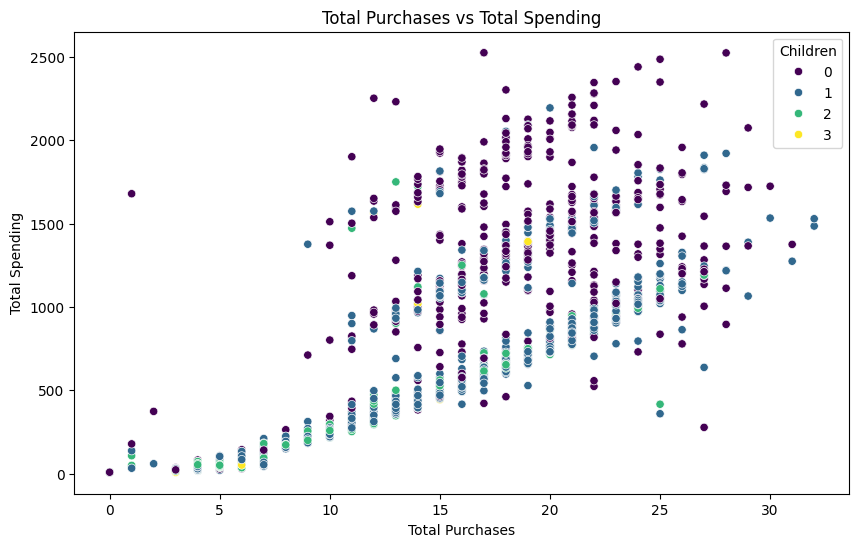

In [16]:
# Analisis hubungan antara Total_Spending dan Total_Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total_Purchases', y='Total_Spending', hue='Children', palette='viridis')
plt.title('Total Purchases vs Total Spending')
plt.xlabel('Total Purchases')
plt.ylabel('Total Spending')
plt.show()

**Insight :**
- There is a potential positive correlation between the total number of purchases and total spending, indicating that the more frequently customers shop, the higher their spending.
- Customers with a high number of purchases but relatively low spending may focus more on lower-priced products or frequently take advantage of promotions.
- Customers with both high purchases and high spending can be considered important premium customers to retain through specialized loyalty programs.

## **Campaign Acceptance Analysis**
- Objective: Understand how many customers respond to the promotions or campaigns offered.

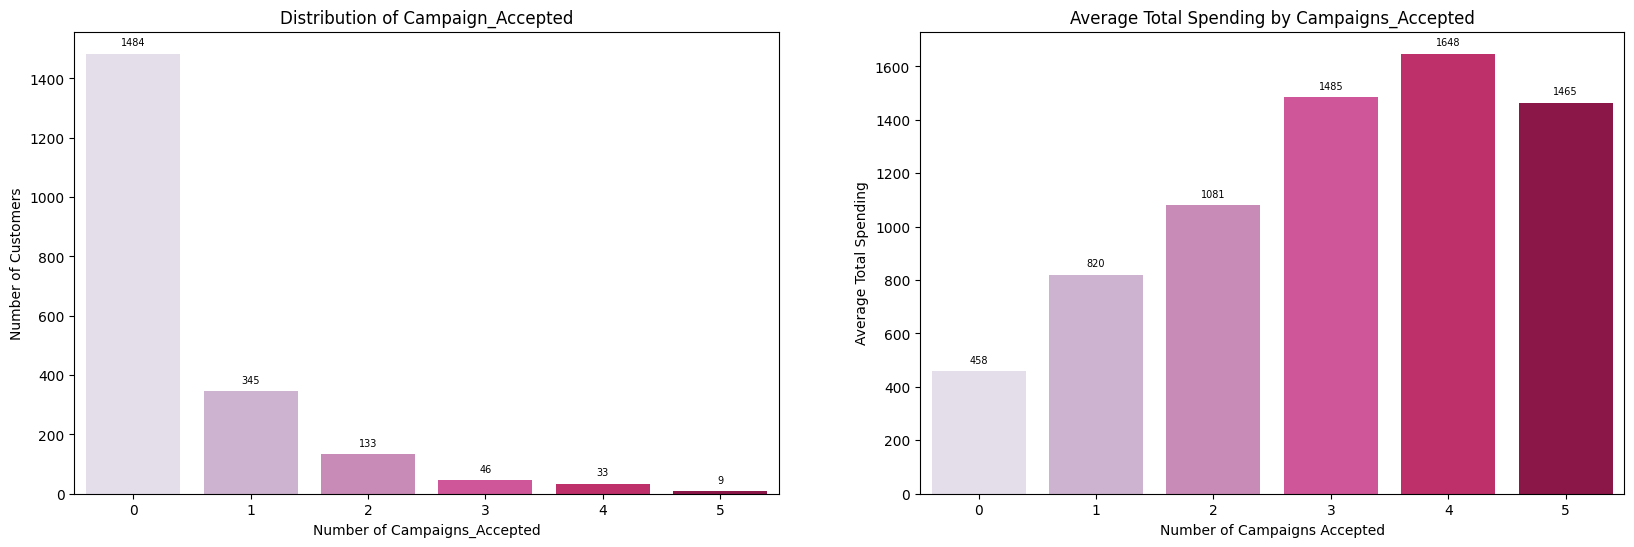

In [17]:
# Distribusi kampanye yang diterima
campaign_accepted_dist = df['Campaign_Accepted'].value_counts().reset_index()
campaign_accepted_dist.columns = ['Campaign_Accepted', 'Count']

# Pengaruh penerimaan kampanye terhadap Total Spending
spending_by_campaign = df.groupby('Campaign_Accepted')['Total_Spending'].mean().reset_index()

plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plots = sns.barplot(data=campaign_accepted_dist, x='Campaign_Accepted', y='Count', palette='PuRd')
plt.title('Distribution of Campaign_Accepted')
plt.xlabel('Number of Campaigns_Accepted')
plt.ylabel('Number of Customers')
annotate_bars(plots)

plt.subplot(1,2,2)
plots = sns.barplot(data=spending_by_campaign, x='Campaign_Accepted', y='Total_Spending', palette='PuRd')
plt.title('Average Total Spending by Campaigns_Accepted')
plt.xlabel('Number of Campaigns Accepted')
plt.ylabel('Average Total Spending')
annotate_bars(plots)
plt.show()

**Insight :**
- **Ineffectiveness of Campaigns for Most Customers**
	1.	Analysis: The distribution shows that most customers did not respond to the offered campaigns, indicating that the existing campaigns may be less appealing or irrelevant to the majority of customers.
	2.	Insight: The company needs to reevaluate its marketing campaign strategies to understand why many customers are not responding. This may require a more personalized approach or more specific segments to improve acceptance rates.
- **Campaign Number 4 Has a Significant Impact**
	1.	Analysis: Although most customers did not accept the campaigns, Campaign Number 4 successfully increased the average spending among those who did respond. This indicates that this campaign is more effective in driving higher spending.
	2.	Insight: Campaign Number 4 has effective elements that encourage spending, so further analysis is needed to understand which components made it successful. These elements can be applied or adjusted in other campaigns to enhance effectiveness.
- **Potential to Optimize Other Campaigns**
	1.	Analysis: If Campaign Number 4 successfully increased average spending, there is potential to optimize other campaigns by adjusting strategies or offering incentives similar to those in Campaign Number 4.
	2.	Insight: The company can conduct A/B testing or marketing experiments to see if the strategies from Campaign Number 4 can be applied to other campaigns or if there are ways to incorporate successful elements from Campaign Number 4 into new campaigns.

In [18]:
df[df['Cmp4'] == 1].sort_values('Income', ascending=False).head(10)

,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
248,39,Middle Age,Graduate,Divorced,102692.0,0,2013-04-05,5,168,148,444,32,172,148,1112,1,6,9,13,2,28,28.000000,0,1,1,1,1,0,1,5
200,35,Middle Age,Postgraduate,Married,102160.0,0,2012-11-02,54,763,29,138,76,176,58,1240,0,7,9,10,4,26,inf,0,1,1,1,0,0,1,4
123,30,Middle Age,Graduate,Single,101970.0,0,2013-03-12,69,722,27,102,44,72,168,1135,0,6,8,13,2,27,inf,0,1,1,1,0,0,1,4
632,54,Adult,Postgraduate,Single,98777.0,0,2014-02-17,23,1000,19,711,125,115,38,2008,0,4,6,9,1,19,inf,0,1,0,0,0,0,0,1
1858,36,Middle Age,Graduate,Married,96876.0,0,2013-08-06,79,908,43,735,40,194,21,1941,1,7,7,9,2,23,23.000000,0,1,1,1,0,0,1,4
1392,43,Middle Age,Postgraduate,Married,94871.0,2,2012-09-01,99,169,24,553,188,0,144,1078,1,8,5,4,7,17,17.000000,0,1,1,0,0,0,1,3
1840,56,Adult,Graduate,Single,94472.0,1,2014-04-03,75,1017,33,417,108,100,16,1691,1,5,5,5,5,15,15.000000,0,1,1,0,0,0,0,2
909,60,Adult,Graduate,Married,94384.0,0,2013-03-04,62,1111,24,790,160,45,172,2302,0,5,8,5,2,18,inf,0,1,1,1,0,0,1,4
1379,44,Middle Age,Graduate,Single,93790.0,0,2014-02-12,16,1302,68,731,89,114,45,2349,0,6,7,12,2,25,inf,0,1,1,1,0,0,1,4
798,59,Adult,Graduate,Married,93404.0,3,2013-05-07,97,1279,15,287,20,0,15,1616,3,3,4,7,5,14,4.666667,0,1,1,0,0,0,0,2


## **Conclusion**

1.	**Identify High-Profit Customers:**
	- Based on the analysis, I found that certain customer groups (e.g., customers with higher education levels or specific marital statuses) tend to spend more on particular products. This conclusion indicates who the primary target market is that supports the company’s profits.
2.	**Effectiveness of Promotional Campaigns:**
	- If specific promotional campaigns show high acceptance rates among high-profit customers, I conclude that those campaigns are effective in boosting the company’s profits. Conversely, campaigns with low acceptance rates may need to be reevaluated or discontinued.
3.	**Dominant Purchase Channels:**
	- The analysis may reveal that most purchases are made through certain channels, such as in-store purchases or through the website. This indicates which channels are most effective in generating sales and should be prioritized.
4.	**Customer Spending in Product Categories:**
	- I conclude that customers tend to spend more money on certain product categories (such as wine or meat), indicating that these products are key profit drivers. Focus can be given to strengthening offerings in these categories.

## **Recommendation**

1.	**Optimize Targeting of High-Value Customers:**
	- Recommend focusing marketing and promotional efforts on customer groups identified as key profit contributors, such as through personalized campaigns based on their demographic profiles or purchasing behaviors.
2.	**Evaluate and Adjust Promotional Campaigns:**
	- Suggest evaluating the effectiveness of promotional campaigns based on data. Less effective campaigns may need to be discontinued or replaced, while successful campaigns could be expanded or further optimized.
3.	**Strengthen Key Purchase Channels:**
	- Recommend increasing investment and support for the purchase channels most used by customers, such as enhancing the online shopping experience if the majority of purchases are made through the website.
4.	**Develop and Offer Premium Products:**
	- Suggest strengthening offerings in product categories that generate the highest spending from customers. This could include special promotions, product bundling, or developing new products within those categories.